In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

filepath = r'D:\18-DS\github\SDSHL\data\processed'

In [18]:
df = pd.read_csv( filepath + r'\4-Hinglish_Sarcasm_Clean_FE.csv',index_col="ID")

In [19]:
len(df.columns)

21

In [21]:
df = pd.read_csv( filepath + r'\4-Hinglish_Sarcasm_Clean_FE.csv',index_col="ID")
df= df[ ['words','eng_words', 'no_emotion', 'no_hashtag','label'] ]
df1  = pd.read_csv( filepath + r'\1-Hinglish_SarcasmCSV.csv', sep='\t', index_col="ID")
df1['sentlen'] = df1.sentence.apply(len)
df1=df1[ ['twitter','sentlen']]
df = pd.concat( [df,df1], axis=1)

In [22]:
df.rename(columns = {'words': '# of Words', 'eng_words' : '# of Eng Words', 
                     'no_emotion' : '# of Emoticons', 'no_hashtag': '# of Hashtags', 
                     'sentlen': 'Sent Length', 'label':'Sarcastic Sent'}, inplace=True)

In [23]:
df1 = df.groupby(["twitter","Sarcastic Sent"]).mean().reset_index()
df1

,twitter,Sarcastic Sent,# of Words,# of Eng Words,# of Emoticons,# of Hashtags,Sent Length
0,N,0,16.765363,0.027933,0.000000,0.000000,81.318436
1,N,1,27.212014,0.060071,0.000000,0.000000,123.738516
2,Y,0,23.347138,0.551766,0.455542,0.285018,111.967113
3,Y,1,23.490934,0.631799,0.856346,0.359833,111.948396


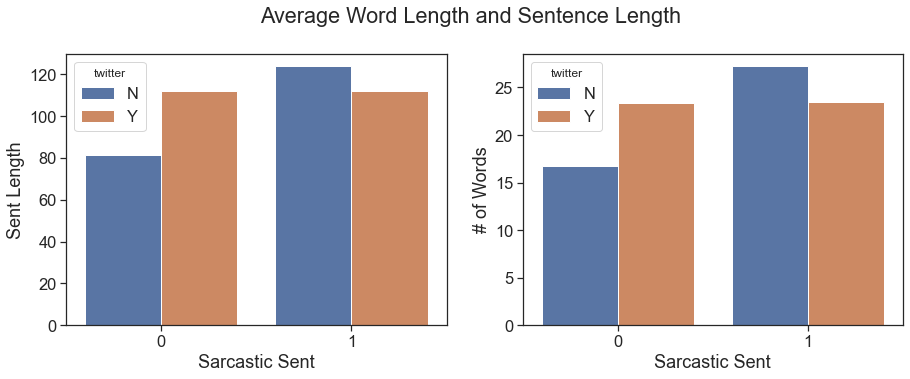

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df1['Sarcastic Sent'], df1['Sent Length'], hue='twitter', data=df1)

plt.subplot(1,2,2)
sns.barplot(df1['Sarcastic Sent'], df1['# of Words'], hue='twitter', data=df1)

plt.suptitle("Average Word Length and Sentence Length", y=1.01)
plt.show()

In [30]:
def plotdist(fldname,title):
    sns.set_style("ticks")
    
    fig = plt.figure(figsize=(20,5))

    fig.suptitle(title, fontsize=20)

    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)


    ax1.set(title="All")
    sns.distplot(ax=ax1,a=df[fldname], label="ALL"  )

    ax2.set(title="Sarcastic")
    sns.distplot(ax=ax2,a=df[fldname][ df['Sarcastic Sent']==1])

    ax3.set(title="Non-Sarcastic")
    sns.distplot(ax=ax3,a=df[fldname][ df['Sarcastic Sent']==0])

    plt.setp(ax1.get_xticklabels(), Fontsize=14)
    plt.setp(ax1.get_yticklabels(), Fontsize=14)
    plt.setp(ax1.title, Fontsize=18)

    plt.setp(ax2.get_xticklabels(), Fontsize=14)
    plt.setp(ax2.get_yticklabels(), Fontsize=14)
    plt.setp(ax2.title, Fontsize=18)

    plt.setp(ax3.get_xticklabels(), Fontsize=14)
    plt.setp(ax3.get_yticklabels(), Fontsize=14)
    plt.setp(ax3.title, Fontsize=18)

    plt.subplots_adjust(top=0.80)
    plt.show()

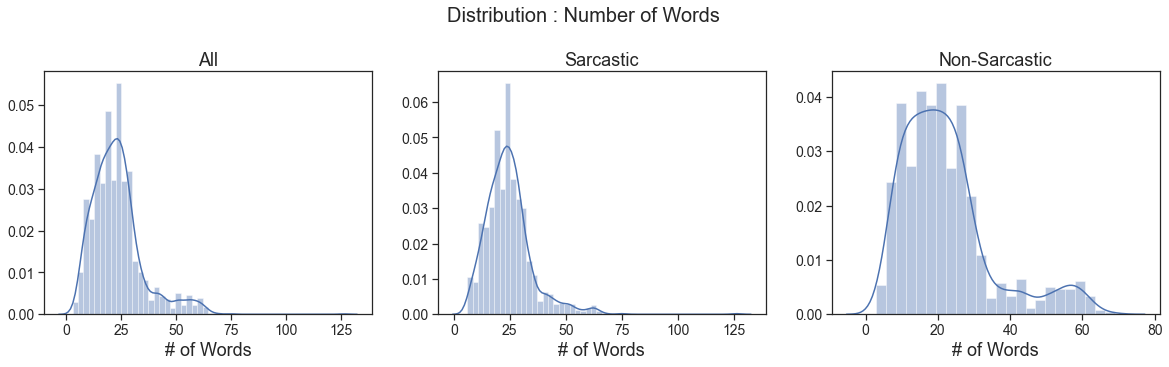

In [31]:
plotdist('# of Words', "Distribution : Number of Words")

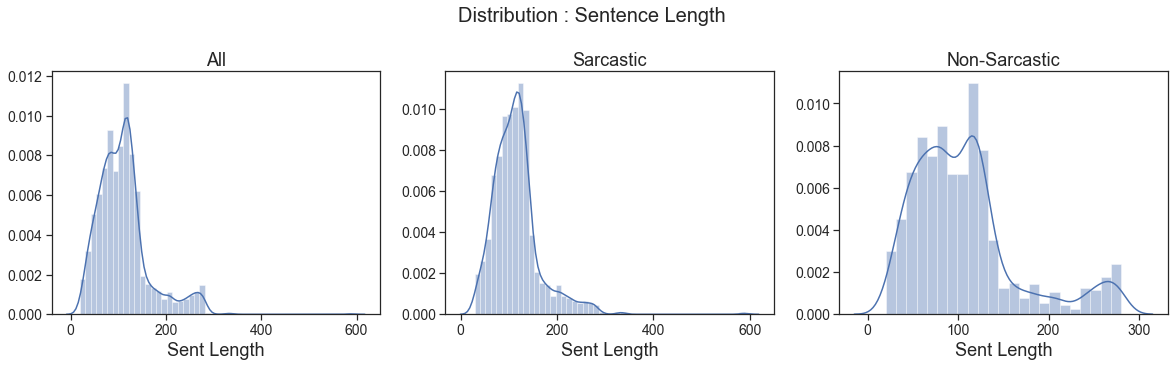

In [32]:
plotdist('Sent Length', "Distribution : Sentence Length")

In [33]:
df=df[df.twitter=="Y"]

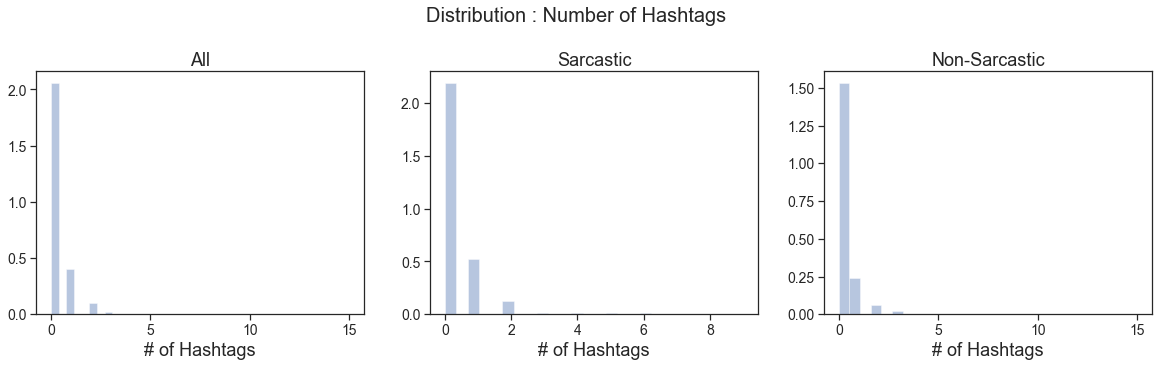

In [34]:
plotdist('# of Hashtags', "Distribution : Number of Hashtags")

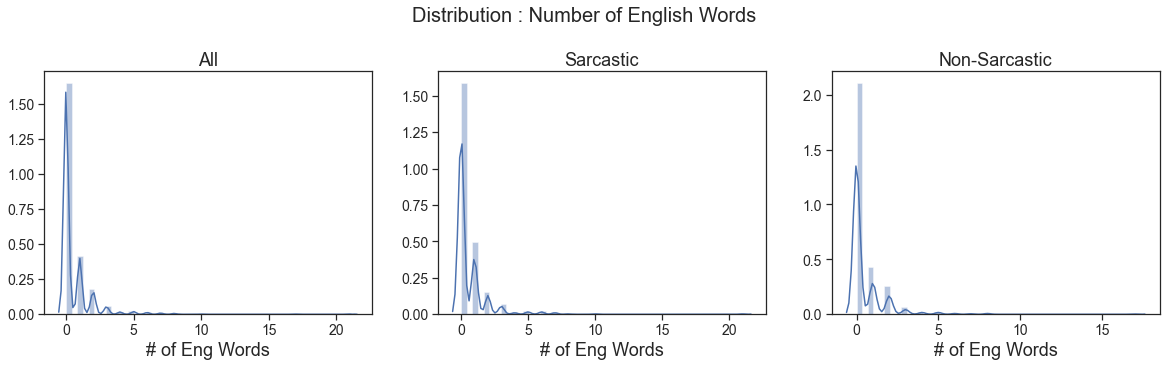

In [35]:
plotdist('# of Eng Words', "Distribution : Number of English Words")

In [36]:
df.corr()

,# of Words,# of Eng Words,# of Emoticons,# of Hashtags,Sarcastic Sent,Sent Length
# of Words,1.000000,0.164479,0.022604,0.146049,0.006036,0.970463
# of Eng Words,0.164479,1.000000,-0.013929,0.576017,0.029802,0.255660
# of Emoticons,0.022604,-0.013929,1.000000,0.029941,0.155057,0.046359
# of Hashtags,0.146049,0.576017,0.029941,1.000000,0.041859,0.259523
Sarcastic Sent,0.006036,0.029802,0.155057,0.041859,1.000000,-0.000169
Sent Length,0.970463,0.255660,0.046359,0.259523,-0.000169,1.000000


In [43]:
df.corr().columns

Index(['# of Words', '# of Eng Words', '# of Emoticons', '# of Hashtags',
       'Sarcastic Sent', 'Sent Length'],
      dtype='object')

In [50]:
lbl

['# of Words',
 '# of Eng Words',
 '# of Emoticons',
 '# of Hashtags',
 'Sarcastic Sent',
 'Sent Length']

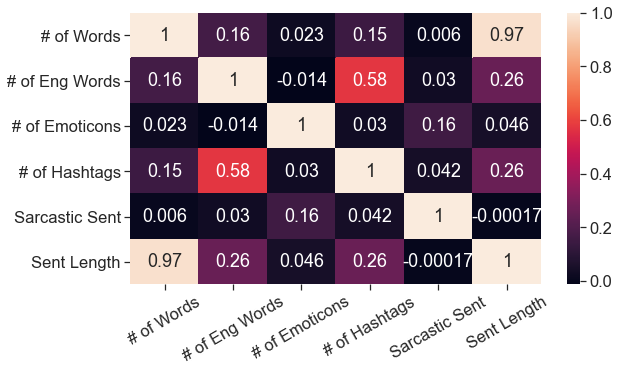

In [51]:
lbl = list(df.corr().columns)
fig, ax = plt.subplots(figsize=(9.2, 5))
g=sns.heatmap(df.corr(), annot=True,ax=ax)
g.set_xticklabels(lbl,rotation=30)
plt.show()

<Figure size 1440x1440 with 0 Axes>

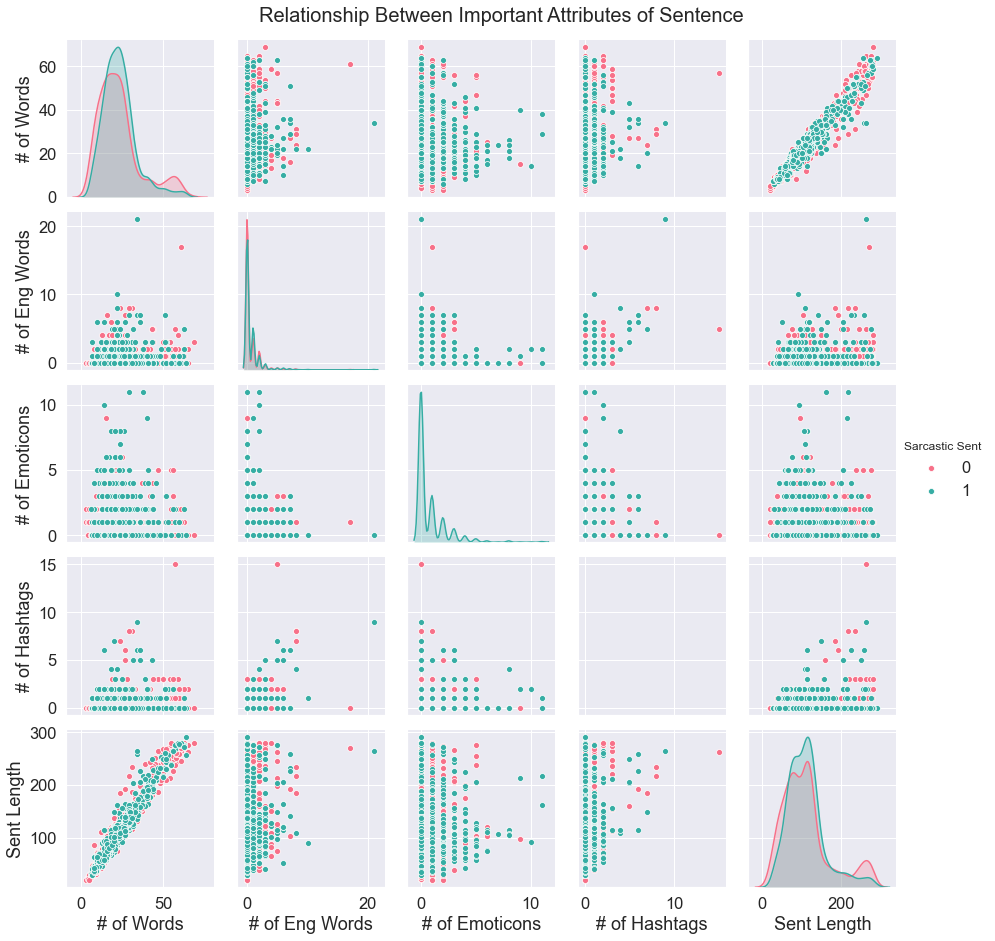

In [15]:
fig = plt.figure(figsize=(20,20))
#sns.set_title(, fontsize=20)

sns.set(font_scale = 1.5)

ax = sns.pairplot(df,  hue="Sarcastic Sent", diag_kind="kde", kind="scatter", palette="husl")
ax.fig.suptitle("Relationship Between Important Attributes of Sentence", y=1.03, fontsize=20)


plt.show()

In [46]:
df.columns

Index(['words', 'eng_words', 'no_emotion', 'no_hashtag', 'label', 'twitter'], dtype='object')

# Experiments

In [ ]:
import seaborn as sns
planets = sns.load_dataset("planets")
g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)